In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('apartment_sales_spb.csv')

In [4]:
df

,Тип,Цена (₽),Комнаты,Площадь (м²),Жилая площадь (м²),Площадь кухни (м²),Потолок,Этаж,Всего этажей в доме,Стены,Район,Метро,Расстояние до метро (км)
0,Квартира,8200000,1,40.85,18.7,10.9,NaN,4,10,Панельный,Калининский,NaN,NaN
1,Квартира,13599000,4,94.80,80.8,8.0,2.80,2,5,Кирпичный,Выборгский,Лесная,0.6
2,Квартира,7700000,4,50.00,44.0,6.0,3.00,5,5,Индивидуальный,Московский,Московская,NaN
3,Квартира,9390000,2,58.50,28.5,17.6,2.56,18,24,Индивидуальный,Невский,NaN,NaN
4,Студия,3500000,0,24.10,15.0,2.0,2.50,1,16,Индивидуальный,Всеволожский,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,Квартира,9500000,2,56.40,32.5,11.7,NaN,2,18,Монолит,Всеволожский,Улица Дыбенко,1.4
8785,Квартира,124000000,3,248.00,179.9,10.0,NaN,10,15,Панельный,Петроградский,Чкаловская,NaN
8786,Студия,4700000,0,24.10,18.0,2.0,2.65,2,12,Индивидуальный,Красносельский,NaN,NaN
8787,Студия,4580000,0,26.70,14.0,NaN,NaN,13,16,Кирпично-Монолитный,Всеволожский,Девяткино,1.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Тип                       8789 non-null   object 
 1   Цена (₽)                  8789 non-null   int64  
 2   Комнаты                   8789 non-null   int64  
 3   Площадь (м²)              8789 non-null   float64
 4   Жилая площадь (м²)        8789 non-null   float64
 5   Площадь кухни (м²)        8219 non-null   float64
 6   Потолок                   7184 non-null   float64
 7   Этаж                      8789 non-null   int64  
 8   Всего этажей в доме       8789 non-null   int64  
 9   Стены                     8787 non-null   object 
 10  Район                     8788 non-null   object 
 11  Метро                     6702 non-null   object 
 12  Расстояние до метро (км)  6196 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 892.8+ KB


In [6]:
df.dropna(inplace=True,subset=['Метро'])
df.dropna(inplace=True,subset=['Район'])
df.dropna(inplace=True,subset=['Стены'])
df['Потолок'] = df['Потолок'].fillna(0)
df = df[df['Расстояние до метро (км)'] != 1319.4]
df = df[df['Комнаты'] != 40]
df = df[df['Потолок'] < 300]
df = df[df['Цена (₽)'] != 18900000000]
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Тип                       6686 non-null   object 
 1   Цена (₽)                  6686 non-null   int64  
 2   Комнаты                   6686 non-null   int64  
 3   Площадь (м²)              6686 non-null   float64
 4   Жилая площадь (м²)        6686 non-null   float64
 5   Площадь кухни (м²)        6139 non-null   float64
 6   Потолок                   6686 non-null   float64
 7   Этаж                      6686 non-null   int64  
 8   Всего этажей в доме       6686 non-null   int64  
 9   Стены                     6686 non-null   object 
 10  Район                     6686 non-null   object 
 11  Метро                     6686 non-null   object 
 12  Расстояние до метро (км)  6181 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 679.2+ KB


In [7]:
df['Площадь кухни (м²)'] = df['Площадь кухни (м²)'].fillna(0)
df.loc[df['Потолок'] == 0, 'Потолок'] = df['Потолок'][df['Потолок'] != 0].mean()

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)
# df.fillna(method = 'pad', inplace=True)
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6686 entries, 0 to 6685
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Тип                       6686 non-null   string 
 1   Цена (₽)                  6686 non-null   Int64  
 2   Комнаты                   6686 non-null   Int64  
 3   Площадь (м²)              6686 non-null   Float64
 4   Жилая площадь (м²)        6686 non-null   Float64
 5   Площадь кухни (м²)        6686 non-null   Float64
 6   Потолок                   6686 non-null   Float64
 7   Этаж                      6686 non-null   Int64  
 8   Всего этажей в доме       6686 non-null   Int64  
 9   Стены                     6686 non-null   string 
 10  Район                     6686 non-null   string 
 11  Метро                     6686 non-null   string 
 12  Расстояние до метро (км)  6686 non-null   Float64
dtypes: Float64(5), Int64(4), string(4)
memory usage: 737.9 KB


In [9]:
df.describe()

,Цена (₽),Комнаты,Площадь (м²),Жилая площадь (м²),Площадь кухни (м²),Потолок,Этаж,Всего этажей в доме,Расстояние до метро (км)
count,6686.0,6686.0,6686.0,6686.0,6686.0,6686.0,6686.0,6686.0,6686.0
mean,13228947.950942,1.891415,60.316672,33.401885,11.156716,2.785352,6.320221,11.788214,6.048374
std,19203821.652819,1.315984,42.328006,26.846566,9.804494,0.282719,5.179925,7.012161,12.617982
min,370000.0,0.0,8.0,1.0,0.0,1.0,1.0,1.0,0.1
25%,6000000.0,1.0,35.925,17.0,6.6,2.64,2.0,5.0,0.9
50%,8500000.0,2.0,50.4,28.0,10.0,2.75,5.0,10.0,2.0
75%,14000000.0,3.0,70.2,41.145,14.0,2.8,9.0,16.0,6.048374
max,500000000.0,19.0,655.0,564.7,471.0,8.2,28.0,36.0,298.3


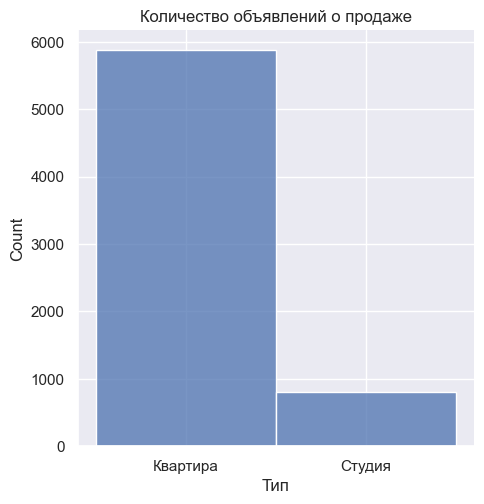

In [14]:
sns.displot(df, x='Тип').set(title='Количество объявлений о продаже');

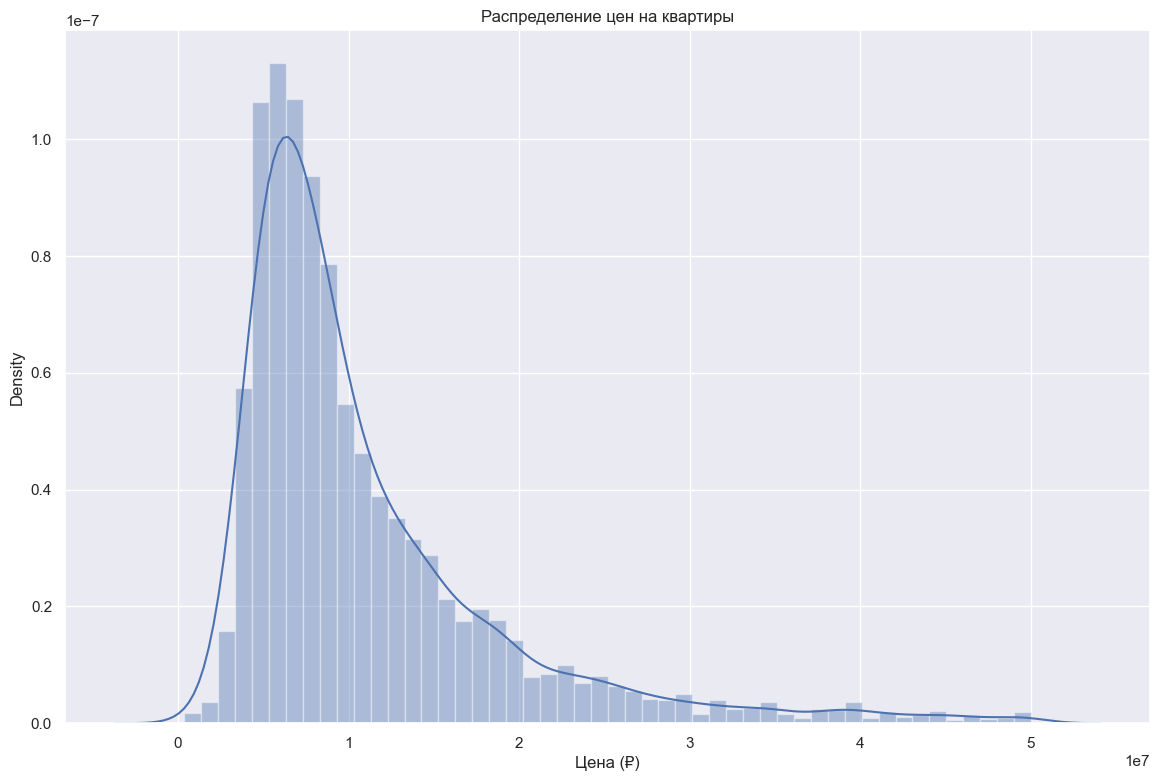

In [11]:
sns.set(rc={'figure.figsize':(14,9)})
sns.distplot(df[df['Цена (₽)'] <= 50000000]['Цена (₽)']).set_title('Распределение цен на квартиры');

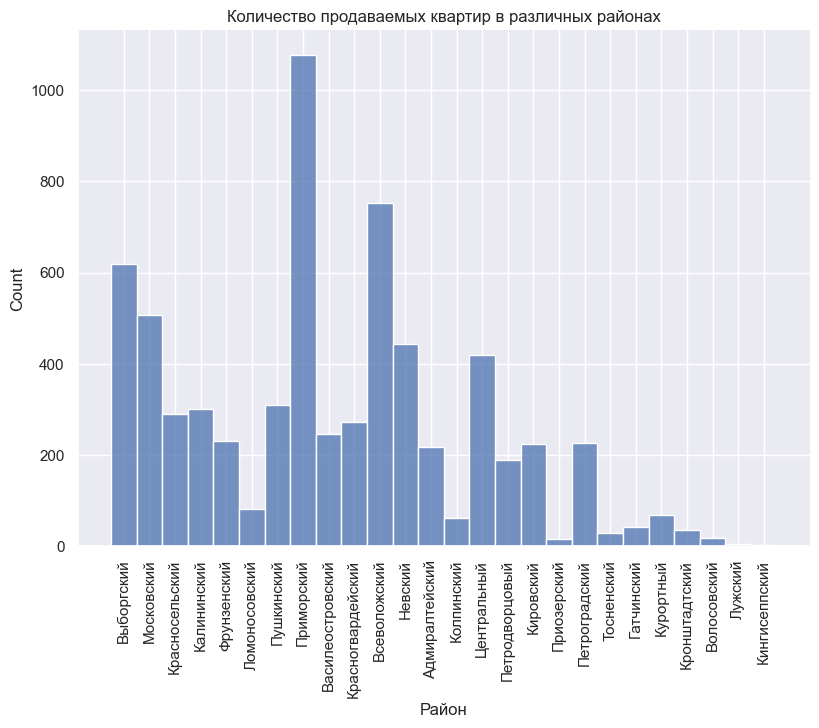

In [15]:
ax = sns.displot(df, x='Район', kind='hist',
            height=6, aspect=1.4).set(title='Количество продаваемых квартир в различных районах')
ax.set_xticklabels(rotation=90);

In [16]:
df['Стены'].unique()

<StringArray>
[          'Кирпичный',      'Индивидуальный',             'Монолит',
        '600.11 серия',           '137 серия', 'Кирпично-Монолитный',
          '504Д серия',           'Панельный',          'Сталинский',
 'Монолитно-панельный',           '602 серия',             'Корабль',
    'Старый фонд (СФ)',           '606 серия',    'Ст.Фонд Кап.Рем.',
             'Блочный',           'Брежневка',           '121 серия',
            'Хрущевка',           '504 серия',          'Деревянный',
   'Блочно-монолитный',       'Реконструкция',           '600 серия',
     'Газо-пено-бетон']
Length: 25, dtype: string

In [17]:
df.loc[df['Стены'] == '600.11 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '137 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '504Д серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '602 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == 'Брежневка', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '121 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '606 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '504 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == '600 серия', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == 'Хрущевка', 'Стены'] = 'Панельный'
df.loc[df['Стены'] == 'Старый фонд (СФ)', 'Стены'] = 'Старый фонд'
df.loc[df['Стены'] == 'Ст.Фонд Кап.Рем.', 'Стены'] = 'Старый фонд'
df.loc[df['Стены'] == 'Реконструкция', 'Стены'] = 'Другие'
df.loc[df['Стены'] == 'Газо-пено-бетон', 'Стены'] = 'Другие'
df.loc[df['Стены'] == 'Деревянный', 'Стены'] = 'Другие'
df.loc[df['Стены'] == 'Блочный', 'Стены'] = 'Другие'
df.loc[df['Стены'] == 'Блочно-монолитный', 'Стены'] = 'Другие'
df.loc[df['Стены'] == 'Корабль', 'Стены'] = 'Другие'

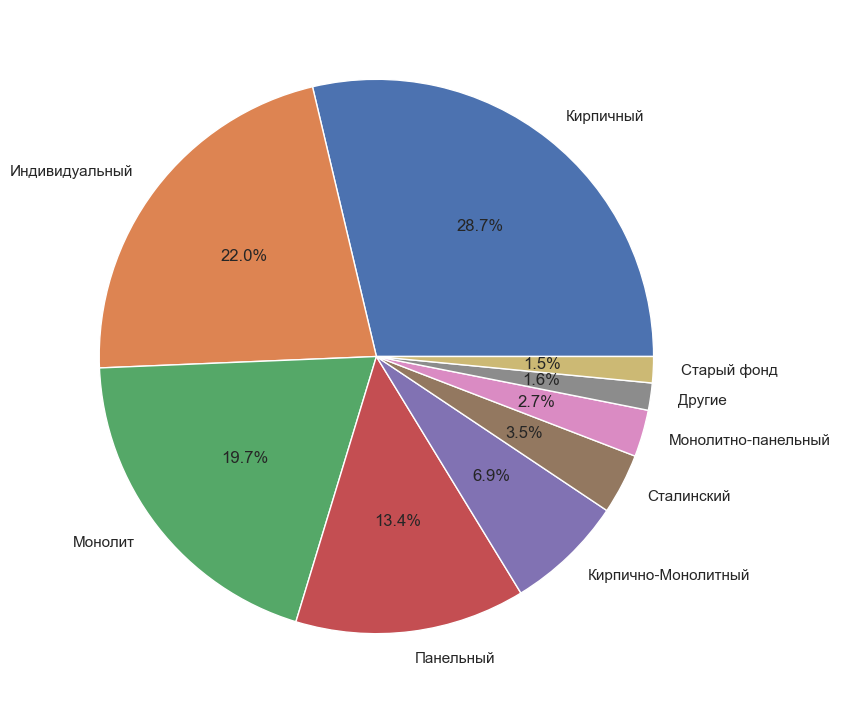

In [18]:
plt.pie(df['Стены'].value_counts(), labels = df['Стены'].unique(), autopct='%1.1f%%');

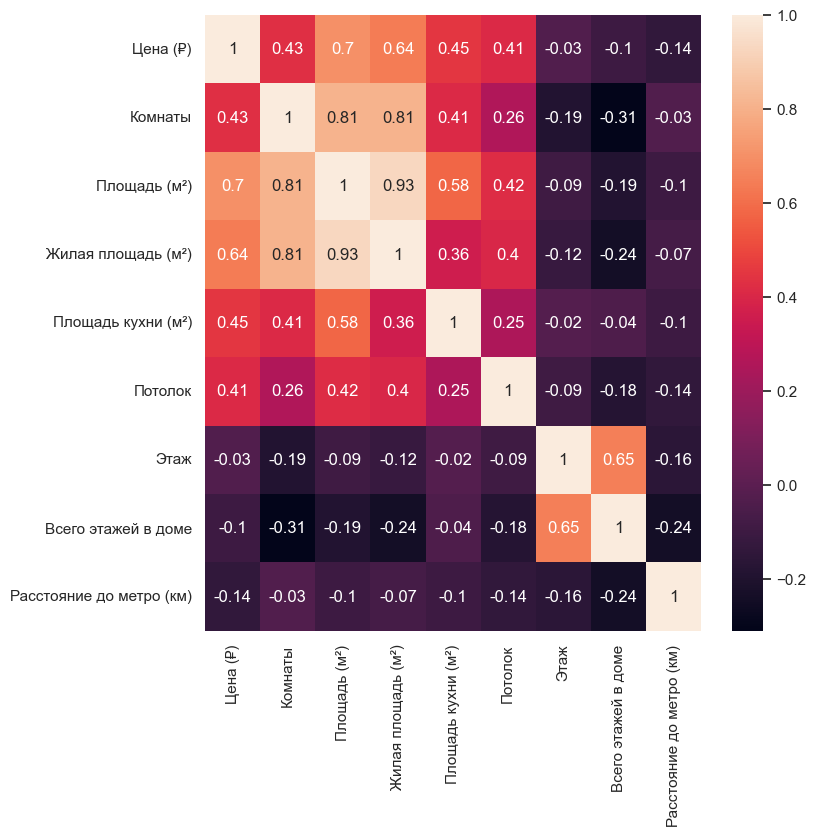

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True);

**Гипотеза 1: Чем больше площадь жилья, тем больше стоимость**

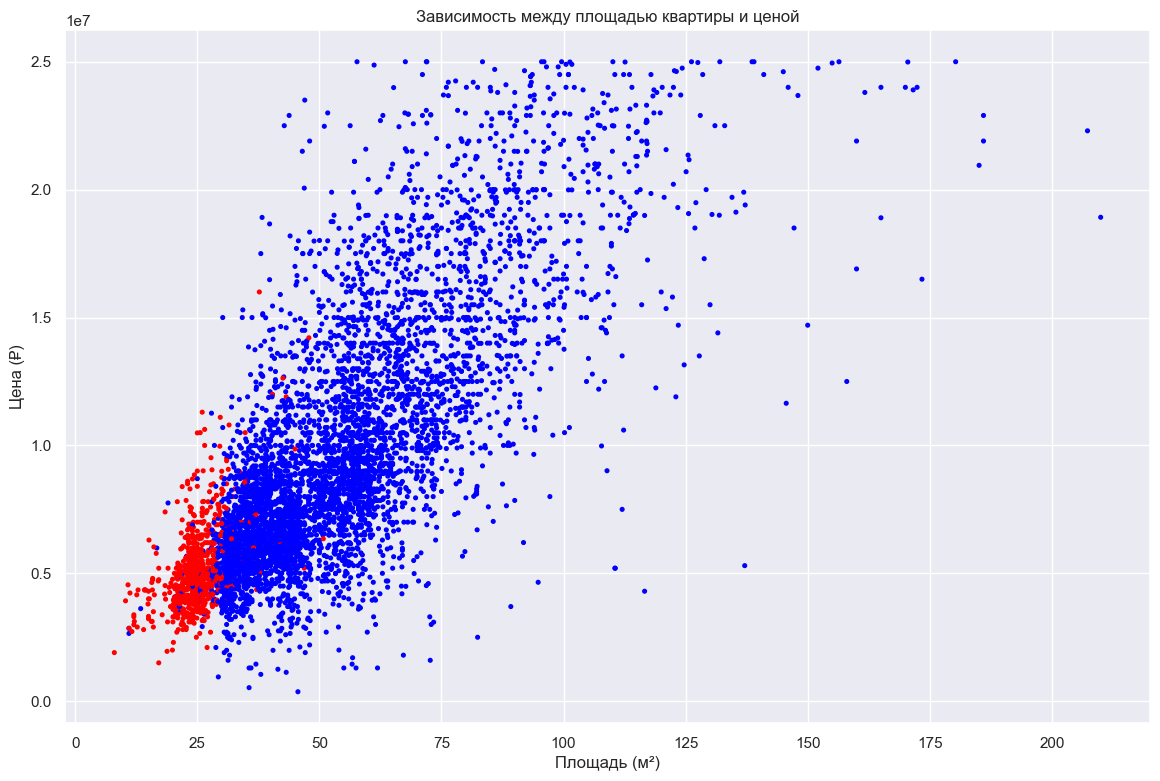

In [20]:
plt.scatter(df[(df['Площадь (м²)'] <= 300) & (df['Цена (₽)'] <= 25000000)]['Площадь (м²)'], 
            df[(df['Площадь (м²)'] <= 300) & (df['Цена (₽)'] <= 25000000)]['Цена (₽)'], s=7,
            color=df[(df['Площадь (м²)'] <= 300) & (df['Цена (₽)'] <= 25000000)]['Тип']\
                    .map({'Квартира': 'blue', 'Студия': 'red'}))
plt.title('Зависимость между площадью квартиры и ценой')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (₽)');

**Гипотеза 2: Квартиры в историческом центре стоят дороже, чем в остальных районах города**

(исторический центр -- Петроградский, Центральный, Адмиралтейский и Василеостровский районы)

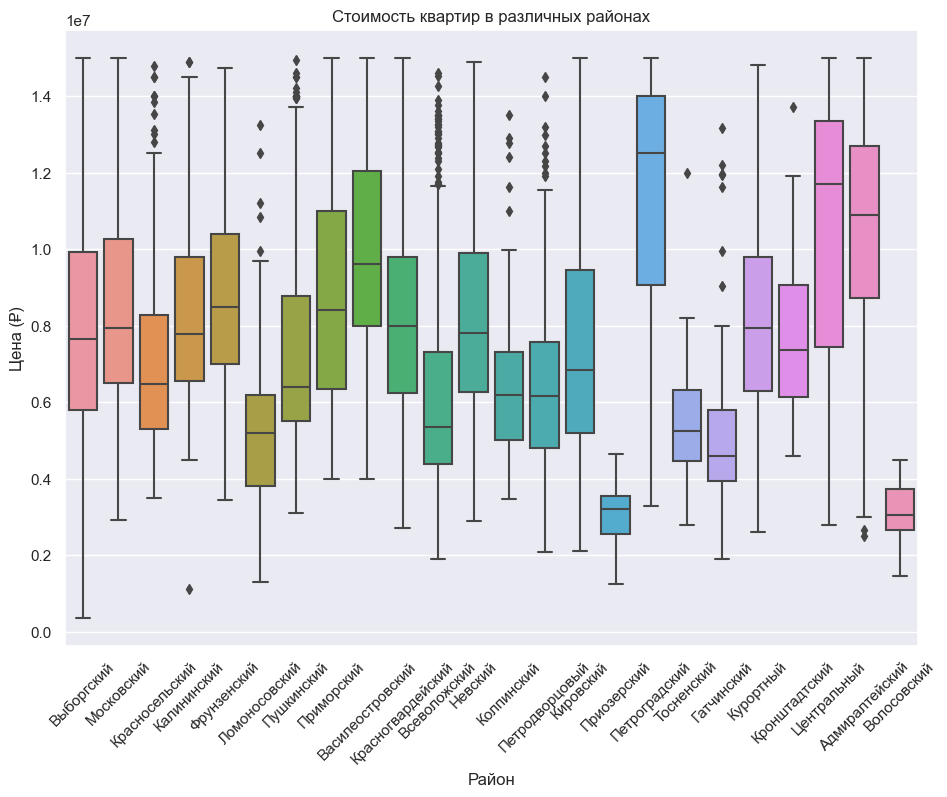

In [21]:
plt.figure(figsize=(11,8))
sns.boxplot(x ='Район', y ='Цена (₽)', data = df[(df['Цена (₽)'] < 15000000) & (df['Район'] != 'Кингисеппский')\
                                                 & (df['Район'] != 'Лужский')])\
                                                .set_title('Стоимость квартир в различных районах')
plt.xticks(rotation=45);

**Гипотеза 3: Квартиры ближе к метро стоят дороже**

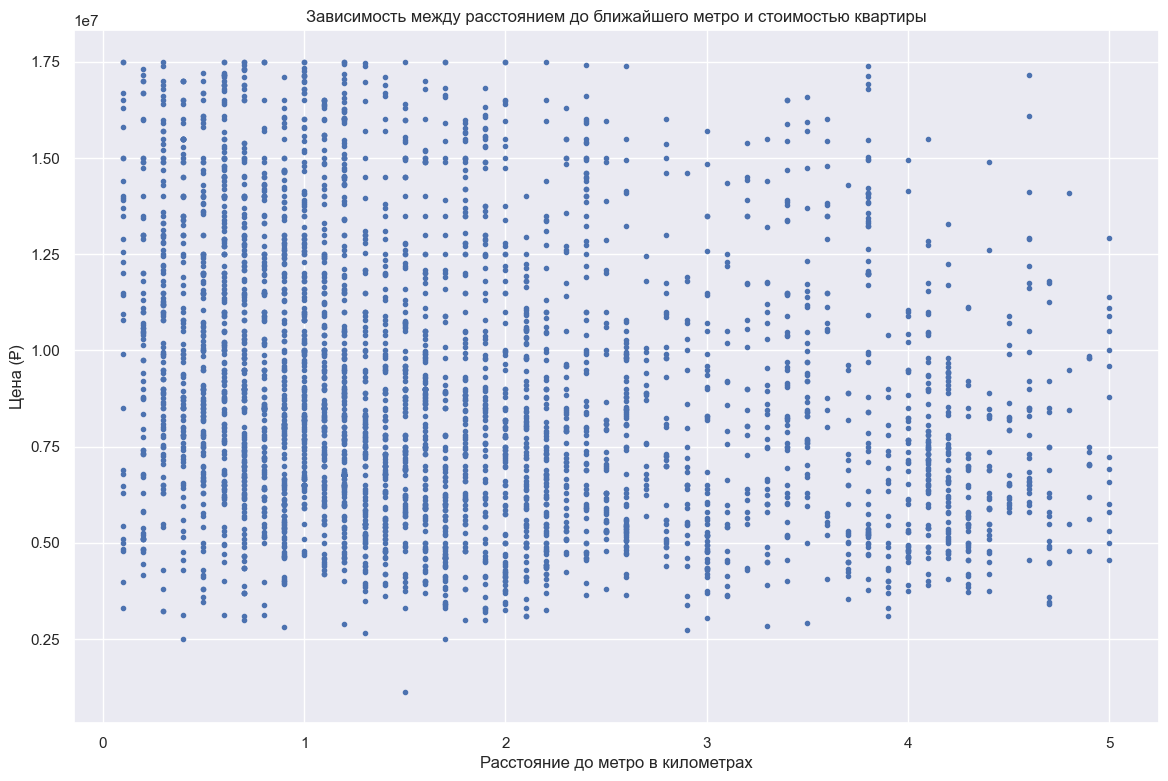

In [22]:
plt.scatter(df[(df['Расстояние до метро (км)'] <= 5) & (df['Цена (₽)'] <= 17500000)]['Расстояние до метро (км)'], 
            df[(df['Расстояние до метро (км)'] <= 5) & (df['Цена (₽)'] <= 17500000)]['Цена (₽)'], s=9)
plt.title('Зависимость между расстоянием до ближайшего метро и стоимостью квартиры')
plt.xlabel('Расстояние до метро в километрах')
plt.ylabel('Цена (₽)');

**Гипотеза 4: Квартиры в кирпичных домах стоят дороже, чем в панельных и монолитных**

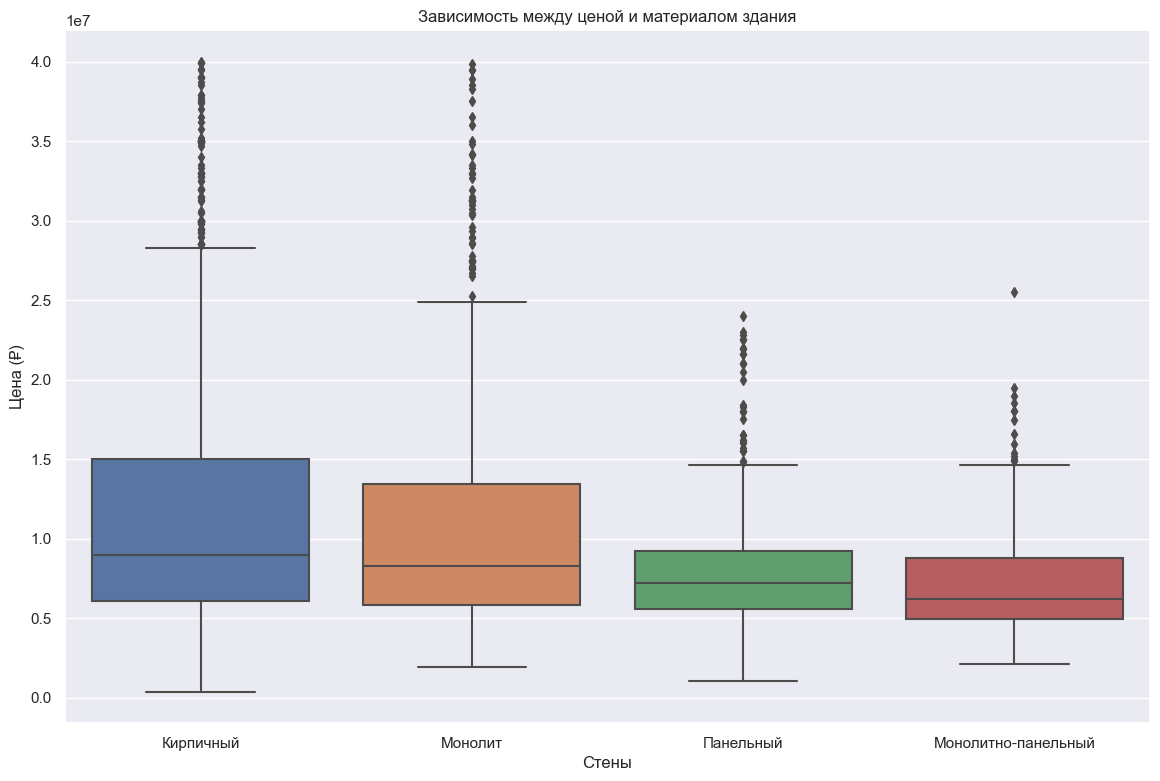

In [23]:
sns.boxplot(x ='Стены', y ='Цена (₽)', data = df[(df['Цена (₽)'] < 40000000) & (df['Стены'] != 'Кирпично-Монолитный') &\
                                                 (df['Стены'] != 'Старый фонд') & (df['Стены'] != 'Сталинский') &\
                                                 (df['Стены'] != 'Индивидуальный') & (df['Стены'] != 'Другие')])\
    .set_title('Зависимость между ценой и материалом здания');